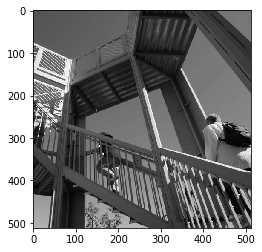

In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


img = misc.ascent()
plt.gray()
plt.imshow(img)

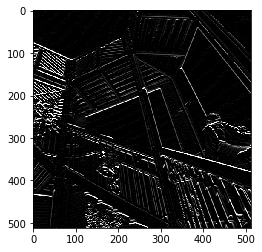

In [2]:
filter = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
# filter = filter.T


features = img.copy()
for i in range(1, img.shape[0] - 1):
    for j in range(1, img.shape[1] - 1):
        conv = img[i - 1, j - 1] * filter[0][0]
        conv += img[i - 1, j] * filter[0][1]
        conv += img[i - 1, j + 1] * filter[0][2]
        conv += img[i, j - 1] * filter[1][0]
        conv += img[i, j] * filter[1][1]
        conv += img[i, j + 1] * filter[1][2]
        conv += img[i + 1, j - 1] * filter[2][0]
        conv += img[i + 1, j] * filter[2][1]
        conv += img[i + 1, j + 1] * filter[2][2]
        
        conv = 0. if min(conv, 255.) < 0 else min(conv, 255.) 
        
        features[i, j] = conv
        
plt.imshow(features)        

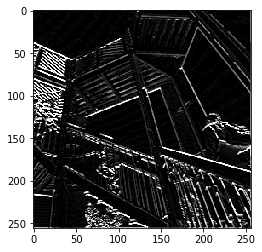

In [3]:
pool_img = np.zeros((img.shape[0] // 2, img.shape[1] // 2))

for i in range(0, features.shape[0], 2):
    for j in range(0, features.shape[1], 2):
        pool_img[i // 2, j // 2] = np.max(features[i:i+2, j:j+2])
        
plt.imshow(pool_img)        

In [8]:
import tensorflow as tf
tf.keras.backend.set_image_data_format('channels_last')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.7559 - acc: 0.7603
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5179 - acc: 0.8246
Epoch 3/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4703 - acc: 0.8385
Epoch 4/5
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4455 - acc: 0.8467
Epoch 5/5
10000/10000 [==============================] - 0s 17us/sample - loss: 0.4563 - acc: 0.8401


[0.4562957269191742, 0.8401]

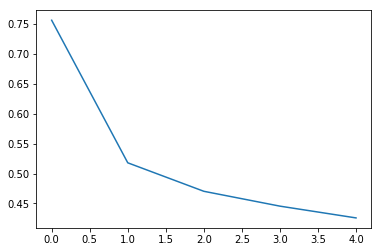

In [9]:
plt.plot(history.history['loss'])

In [14]:
import time

In [27]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.perf_counter()
history = model.fit(x_train, y_train, epochs=5)
toc = time.perf_counter()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.8911 - acc: 0.6797
Epoch 2/5
60000/60000 [==============================] - 20s 340us/sample - loss: 0.5573 - acc: 0.7910
Epoch 3/5
60000/60000 [==============================] - 19s 318us/sample - loss: 0.4745 - acc: 0.8291
Epoch 4/5
60000/60000 [==============================] - 19s 314us/sample - loss: 0.4274 - acc: 0.8455
Epoch 5/5
60000/60000 [==============================] - 19s 309us/sample - loss: 0.3964 - acc: 0.8555

Training time = 96.4202041360004 sec.
10000/10000 [==============================] - 1s 102us/sample - loss: 0.4059 - acc: 0.8534


[0.40591598451137545, 0.8534]

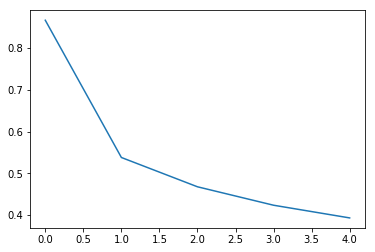

In [22]:
plt.plot(history.history['loss'])

EXERCISES
===

 - Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
 - Remove the final Convolution. What impact will this have on accuracy or training time?
 - How about adding more Convolutions? What impact do you think this will have? Experiment with it.
 - Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.
 - In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

### Change the 32s to 16

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.process_time()
history = model.fit(x_train, y_train, epochs=5)
toc = time.process_time()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 12s 194us/sample - loss: 0.9042 - acc: 0.6683
Epoch 2/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.5578 - acc: 0.7929
Epoch 3/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.4784 - acc: 0.8270
Epoch 4/5
60000/60000 [==============================] - 11s 189us/sample - loss: 0.4350 - acc: 0.8438
Epoch 5/5
60000/60000 [==============================] - 12s 193us/sample - loss: 0.4055 - acc: 0.8530

Training time = 148.56275596099977 sec.
10000/10000 [==============================] - 1s 79us/sample - loss: 0.4204 - acc: 0.8444


[0.4204292279958725, 0.8444]

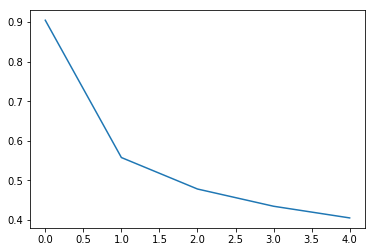

In [29]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Number of filters**
    </td>
    <td> 
      **32**
    </td>
    <td> 
      **16**
    </td>
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td> 
      85.34%
    </td>
    <td> 
      84.44%
    </td> 
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      96
    </td>
    <td> 
      149
    </td> 
</tr> 
</table>

### Change the 32s to 64

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.process_time()
history = model.fit(x_train, y_train, epochs=5)
toc = time.process_time()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 39s 646us/sample - loss: 0.8833 - acc: 0.6785
Epoch 2/5
60000/60000 [==============================] - 38s 626us/sample - loss: 0.5399 - acc: 0.7977
Epoch 3/5
60000/60000 [==============================] - 37s 611us/sample - loss: 0.4647 - acc: 0.8306
Epoch 4/5
60000/60000 [==============================] - 37s 617us/sample - loss: 0.4210 - acc: 0.8482
Epoch 5/5
60000/60000 [==============================] - 37s 625us/sample - loss: 0.3887 - acc: 0.8599

Training time = 645.1771272720002 sec.
10000/10000 [==============================] - 2s 166us/sample - loss: 0.3989 - acc: 0.8590


[0.39892846167087553, 0.859]

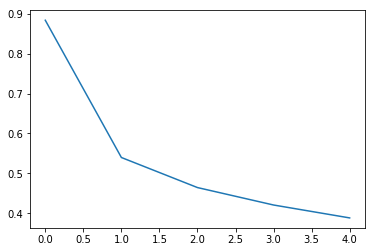

In [31]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Number of filters**
    </td>
    <td> 
      **32**
    </td>
    <td> 
      **16**
    </td>
    <td> 
      **64**
    </td> 
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td>
      85.34%
    </td>
    <td> 
      84.44%
    </td>
    <td> 
      85.9%
    </td>
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      96
    </td>
    <td> 
      149
    </td>
    <td> 
      645
    </td> 
</tr> 
</table>

### Remove the final Convolution

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.perf_counter()
history = model.fit(x_train, y_train, epochs=5)
toc = time.perf_counter()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 19s 310us/sample - loss: 0.6947 - acc: 0.7545
Epoch 2/5
60000/60000 [==============================] - 16s 273us/sample - loss: 0.4892 - acc: 0.8240
Epoch 3/5
60000/60000 [==============================] - 18s 299us/sample - loss: 0.4381 - acc: 0.8446
Epoch 4/5
60000/60000 [==============================] - 19s 323us/sample - loss: 0.4036 - acc: 0.8574
Epoch 5/5
60000/60000 [==============================] - 19s 312us/sample - loss: 0.3768 - acc: 0.8647

Training time = 91.83384816599937 sec.
10000/10000 [==============================] - 1s 91us/sample - loss: 0.3848 - acc: 0.8636


[0.3848466008901596, 0.8636]

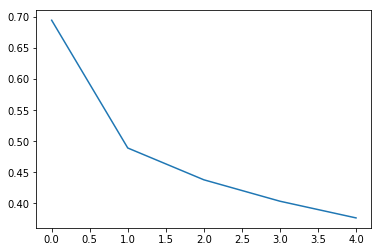

In [34]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Convolution levels**
    </td>
    <td> 
      **2**
    </td>
    <td> 
      **1**
    </td>
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td>
      85.34%
    </td>
    <td> 
      86.36%
    </td>
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      96
    </td>
    <td> 
      92
    </td>
</tr> 
</table>

### How about adding more Convolutions

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

tic = time.perf_counter()
history = model.fit(x_train, y_train, epochs=5)
toc = time.perf_counter()
print ("\nTraining time = " + str(toc - tic) + " sec.")
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 20s 328us/sample - loss: 1.2520 - acc: 0.5507
Epoch 2/5
60000/60000 [==============================] - 16s 267us/sample - loss: 0.6784 - acc: 0.7507
Epoch 3/5
60000/60000 [==============================] - 17s 285us/sample - loss: 0.5907 - acc: 0.7831
Epoch 4/5
60000/60000 [==============================] - 20s 327us/sample - loss: 0.5436 - acc: 0.8015
Epoch 5/5
60000/60000 [==============================] - 18s 295us/sample - loss: 0.5067 - acc: 0.8170

Training time = 91.47469748499861 sec.
10000/10000 [==============================] - 1s 107us/sample - loss: 0.5379 - acc: 0.8000


[0.5378940348148346, 0.8]

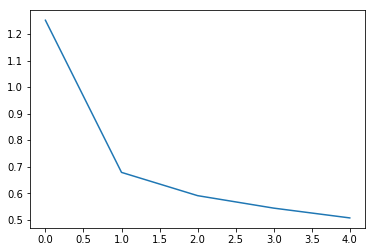

In [53]:
plt.plot(history.history['loss'])

<table> 
<tr>
    <td> 
    **Convolution levels**
    </td>
    <td> 
      **2**
    </td>
    <td> 
      **1**
    </td>
    <td> 
      **3**
    </td>
</tr>
<tr>
    <td> 
    **Accuracy**
    </td>
    <td>
      85.34%
    </td>
    <td> 
      86.36%
    </td>
    <td> 
      80%
    </td>
</tr> 
<tr>
    <td> 
    **Training time (sec)**
    </td>
    <td> 
      96
    </td>
    <td> 
      92
    </td>
    <td> 
      91
    </td>
</tr> 
</table>

### Implemente a callback

Implemente a callback to check on the loss function and to cancel training once it hit a certain amount.

In [54]:
LOSS_THRESHOLD = 0.30

class myCallback(tf.keras.callbacks.Callback): 
 def on_epoch_end(self, epoch, logs={}): 
     if(logs.get('loss') < LOSS_THRESHOLD): 
         print("\nReached %2.2f%% loss, so stopping training!" %(LOSS_THRESHOLD*100)) 
         self.model.stop_training = True
    
callback = myCallback() 

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, callbacks=[callback])

model.evaluate(x_test, y_test)

Epoch 1/20
60000/60000 [==============================] - 19s 324us/sample - loss: 0.9109 - acc: 0.6723
Epoch 2/20
60000/60000 [==============================] - 20s 328us/sample - loss: 0.5326 - acc: 0.8023
Epoch 3/20
60000/60000 [==============================] - 21s 348us/sample - loss: 0.4602 - acc: 0.8320
Epoch 4/20
60000/60000 [==============================] - 19s 312us/sample - loss: 0.4183 - acc: 0.8478
Epoch 5/20
60000/60000 [==============================] - 19s 320us/sample - loss: 0.3907 - acc: 0.8585
Epoch 6/20
60000/60000 [==============================] - 17s 289us/sample - loss: 0.3691 - acc: 0.8658
Epoch 7/20
60000/60000 [==============================] - 16s 268us/sample - loss: 0.3530 - acc: 0.8711
Epoch 8/20
60000/60000 [==============================] - 16s 269us/sample - loss: 0.3401 - acc: 0.8760
Epoch 9/20
60000/60000 [==============================] - 16s 268us/sample - loss: 0.3277 - acc: 0.8802
Epoch 10/20
60000/60000 [==============================] - 16s 2

[0.34350626146793367, 0.876]

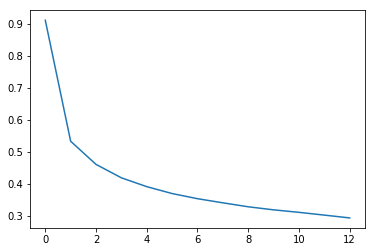

In [55]:
plt.plot(history.history['loss'])